In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
def f(x):
    return x**2+4*np.sin(x*10)

def dx_dy(x_range):
    return 2*x_range+40*np.cos(10*x_range)


In [4]:
def gradient_descent(x, learning_rate, max_iter):
    xj = [x]
    yj = [f(x)]
    for i in range(max_iter):
        x = x - learning_rate * dx_dy(x)
        xj.append(x)
        yj.append(f(x))
    return xj, yj

In [5]:
def adam(x,learning_rate, max_iter):
    beta1 = 0.9
    beta2 = 0.999
    eta = 10e-5

    xj = [x]
    yj = [f(x)]

    w = 0
    v = 0
    for i in range(max_iter):
        w = beta1 * w + (1-beta1) * dx_dy(x)
        v = beta2 * v + (1-beta2) * dx_dy(x)**2

        w_hat = w / (1 - beta1**(i+1))
        v_hat = v / (1 - beta2**(i+1))

        x = x - learning_rate * w_hat / (np.sqrt(v_hat) + eta)

        xj.append(x)
        yj.append(f(x))
    return xj, yj

In [6]:
x = -0.4

learning_rate = 0.05
max_iter = 10

In [7]:
x_gd, y_gd = gradient_descent(x, learning_rate, max_iter)
x_adam, y_adam = adam(x, learning_rate, max_iter)

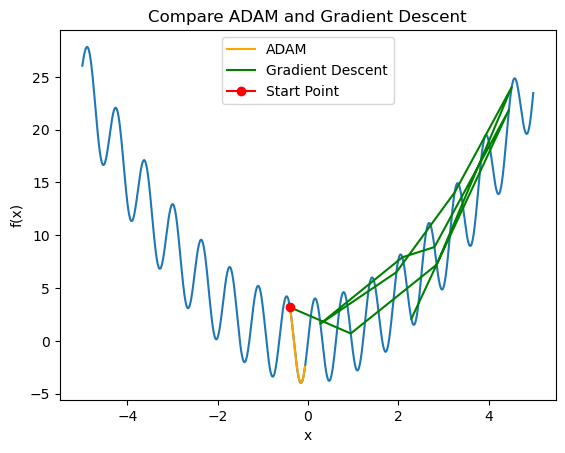

In [9]:
fig = plt.figure()

x_range = np.arange(-5, 5, 0.01)
y_range = [f(x) for x in x_range]
plt.plot(x_range, y_range)

plt.plot(x_adam, y_adam, color="orange", label="ADAM")
plt.plot(x_gd, y_gd, color="green", label="Gradient Descent")
plt.plot(x,f(x), color="r",marker="o", label="Start Point")

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Compare ADAM and Gradient Descent')
plt.legend(loc="upper center")

fig.savefig('/Users/ollerehnfeldt/Desktop/ADAM-Optimizer/report/figures/ADAM_1D.pdf')
